<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/air.png?raw=true" width=800 align="left"/>

# 실습 내용

- 머신러닝 모델링을 위한 코딩은 무조건 할 수 있어야 합니다.
- 코딩 내용을 자세히 알지 못해도 **무작정** 코딩을 진행해봅니다.
- AirQuality 데이터를 대상으로 모델링 해서 오존 농도를 예측해 봅니다.
- LinearRegression 알고리즘을 사용합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=700 align="left"/>

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina' # 시각화 기능을 고해상도(retina)로 출력하기 위함

In [3]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=700 align="left"/>

In [4]:
# 상위 몇 개 행 확인
data.head(3)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3


In [5]:
# 하위 몇 개 행 확인
data.tail(3)

,Ozone,Solar.R,Wind,Temp,Month,Day
150,14,191.0,14.3,75,9,28
151,18,131.0,8.0,76,9,29
152,20,223.0,11.5,68,9,30


In [7]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    int64  
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 7.3 KB


In [13]:
# 기술통계 확인
except_cols = ['Month', 'Day']
data.drop(except_cols, axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Ozone,153.0,42.052288,30.156127,1.0,20.00,34.0,59.00,168.0
Solar.R,146.0,185.931507,90.058422,7.0,115.75,205.0,258.75,334.0
Wind,153.0,9.957516,3.523001,1.7,7.40,9.7,11.50,20.7
Temp,153.0,77.882353,9.465270,56.0,72.00,79.0,85.00,97.0


In [14]:
# 상관관계 확인
data.corr(numeric_only=True) # 숫자에 대해서만 상관관계 출력

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


<Axes: >

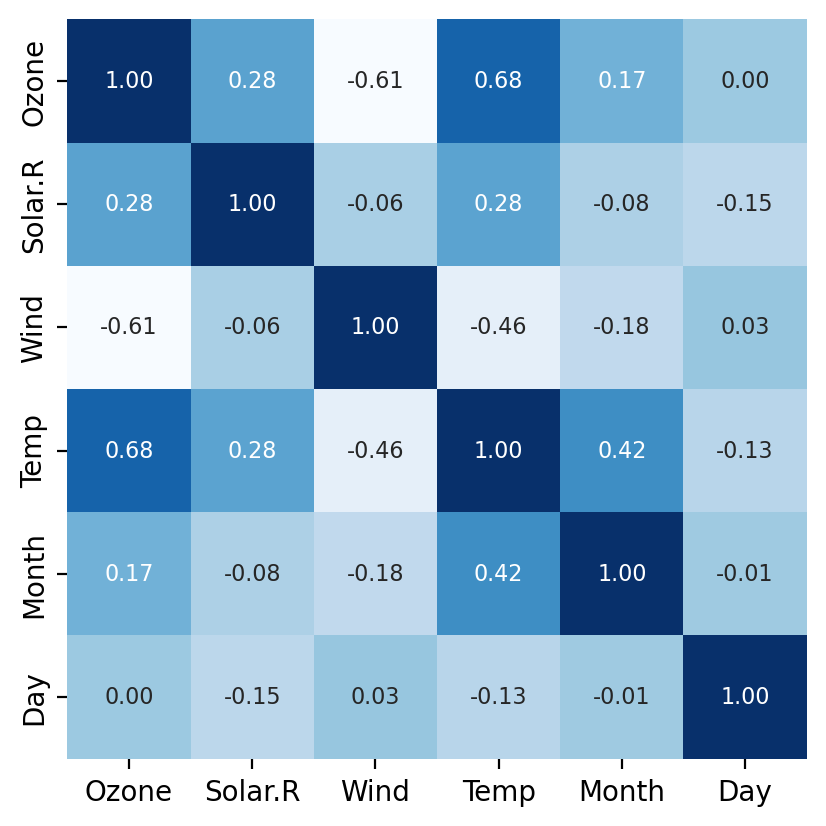

In [18]:
# 상관관계 시각화화
sns.heatmap(data.corr(numeric_only=True),
            annot = True,
            cmap = 'Blues',
            cbar = False,
            square=True,
            fmt='.2f',
            annot_kws={'size':8}
           )

In [17]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

**1) 결측치 처리**

- 결측치가 있으면 제거하거나 적절한 값으로 채웁니다.

In [20]:
# 결측치 확인
data_bk = data.copy()
data.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [21]:
# 전날 값으로 결측치 채우기
data = data.fillna(method='ffill')

# 확인
data.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**2) 변수 제거**

- 분석에 의미가 없다고 판단되는 변수는 제거합니다.

In [22]:
# 변수 제거
drop_cols=['Month','Day']
data.drop(columns = drop_cols, axis=1, inplace =True)

# 확인
data.head(2)

,Ozone,Solar.R,Wind,Temp
0,41,190.0,7.4,67
1,36,118.0,8.0,72


**3) x, y 분리**

- 우선 target 변수를 명확히 지정합니다.
- target을 제외한 나머지 변수들 데이터는 x로 선언합니다.
- target 변수 데이터는 y로 선언합니다. 
- 이 결과로 만들어진 x는 데이터프레임, y는 시리즈가 됩니다.
- 이후 모든 작업은 x, y를 대상으로 진행합니다.

In [24]:
# target 확인
target = 'Ozone'

# 데이터 분리
X = data.drop(target, axis=1)
y = data.loc[:, target]

**4) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [32]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 30% 가 평가용, 70%가 훈련용

# train_test_split 은 한 번 데이터를 섞고 비율대로 자른다.
# random_state에 값을 지정해주면 섞긴 섞지만 그 값에 순서가 고정된다.

In [34]:
# 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(107, 3) (107,)
(46, 3) (46,)


In [35]:
X_train.head()

,Solar.R,Wind,Temp
132,259.0,9.7,73
73,175.0,14.9,81
18,322.0,11.5,68
48,37.0,9.2,65
4,313.0,14.3,56


In [37]:
y_train.head()

132    24
73     27
18     30
48     20
4      19
Name: Ozone, dtype: int64

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

**1) 모델링**

- 회귀 문제 인가요? 분류 문제인가요?
- 회귀인지 분류인지에 따라 사용할 알고리즘과 평가 방법이 달라집니다.
- 우선 다음 알고리즘과 평가 방법을 사용합니다.
    - 알고리즘: LinearRegression
    - 평가방법: mean_absolute_error

In [38]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [39]:
# 2단계: 선언하기
model = LinearRegression()

In [41]:
# 3단계: 학습하기
model.fit(X_train, y_train)

LinearRegression()

In [42]:
# 4단계: 예측하기
y_pred = model.predict(X_test)

In [45]:
# 5단계: 평가하기
print('MAE', mean_absolute_error(y_test, y_pred))

# 평균이 train과 test 결과의 평균 차이가 13.9 정도 차이 났다.

MAE 13.976843190385708


In [47]:
print(y_test.values[:10]) # 실제값
print(y_pred[:10]) # 예측값

[24 18 97 47 34 22 66 18 69 27]
[13.84003067  5.82919112 81.93563027 58.41267418 50.86150737 31.52971121
 66.8083547  -8.56411529 50.2136544  39.13346172]


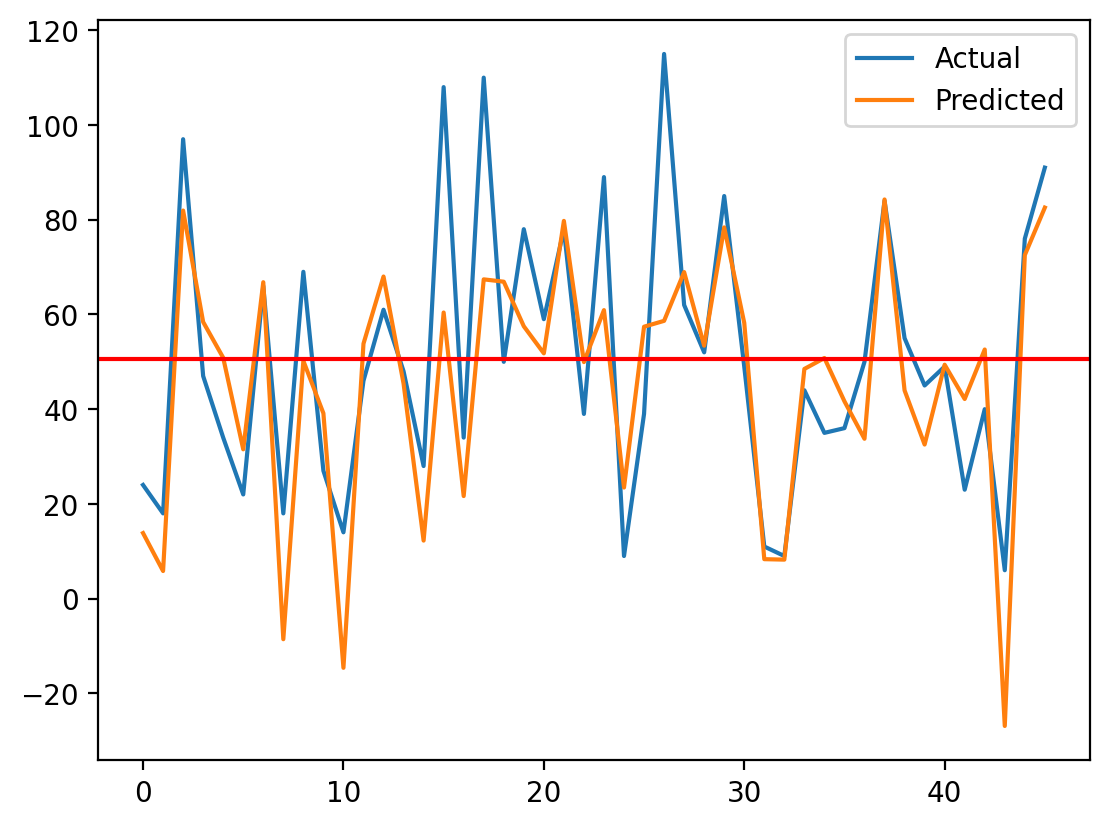

In [56]:
# 시각화 -> 평균보단 나은 모델이다
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_test.mean(), color = 'red')
plt.show()

In [53]:
help(plt.axhline)

Help on function axhline in module matplotlib.pyplot:

axhline(y=0, xmin=0, xmax=1, **kwargs)
    Add a horizontal line across the Axes.
    
    Parameters
    ----------
    y : float, default: 0
        y position in data coordinates of the horizontal line.
    
    xmin : float, default: 0
        Should be between 0 and 1, 0 being the far left of the plot, 1 the
        far right of the plot.
    
    xmax : float, default: 1
        Should be between 0 and 1, 0 being the far left of the plot, 1 the
        far right of the plot.
    
    Returns
    -------
    `~matplotlib.lines.Line2D`
    
    Other Parameters
    ----------------
    **kwargs
        Valid keyword arguments are `.Line2D` properties, except for
        'transform':
    
        Properties:
        agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
        alpha: scalar or None
        animate